In [449]:
import numpy as np
import pandas as pd

In [450]:
df = pd.read_csv('/content/titanic - titanic.csv')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Data Dictionary:

survival	Survival	0 = No, 1 = Yes


---


pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd


---


sex	sex	(female , male)


---


Age	Age in years


---


sibsp	# of siblings / spouses aboard the Titanic


---


parch	# of parents / children aboard the Titanic


---


ticket	Ticket number


---


fare	Passenger fare


---


cabin	Cabin number


---


embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [451]:
df.drop(['class','who','embark_town','alive','alone','adult_male','deck'],axis=1,inplace=True)


After exploring my dataset, I noticed that the 'class' and 'pclass' columns contain the same values, so I decided to drop one of them. Additionally, I removed the 'who,' 'alive,' and 'alone' columns since they don't provide any beneficial information for my analysis. I also observed that the 'embark_town' and 'embarked' columns are redundant, as they have the same values, so I dropped one of those as well.

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [453]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2


In [454]:
df['age'].value_counts()

,count
age,
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1


In [455]:
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [456]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [457]:
df.dropna(subset=['embarked'], inplace=True)


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [459]:
df['sex']=df['sex'].map({'male':0,'female':1})

In [460]:
df['embarked']=df['embarked'].map({'S':0,'C':1,'Q':2})

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    int64  
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [462]:
df['age'] = np.ceil(df['age']).astype(int)


In [463]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.725534,0.524184,0.382452,32.096681,0.362205
std,0.486260,0.834700,0.477538,12.969083,1.103705,0.806761,49.697504,0.636157
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


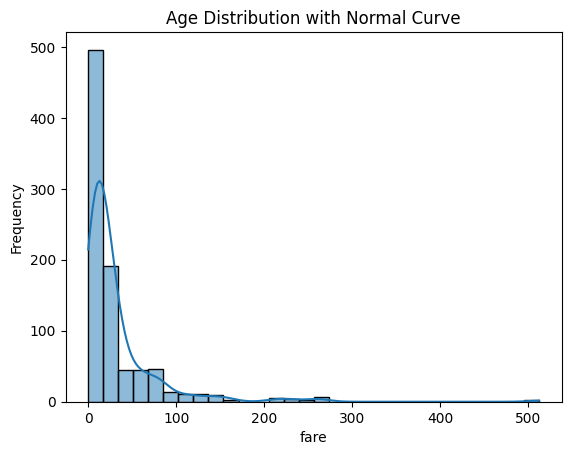

In [464]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'age' is the column of interest
sns.histplot(df['fare'], kde=True, bins=30)

# Adding labels and title
plt.xlabel('fare')
plt.ylabel('Frequency')
plt.title('Age Distribution with Normal Curve')

# Show the plot
plt.show()


In [467]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05)
df['outliers'] = iso_forest.fit_predict(df[['fare']])

# Remove outliers
df = df[df['outliers'] == 1]


In [468]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,outliers
count,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.0
mean,0.367681,2.365340,0.337237,29.618267,0.517564,0.359485,24.264773,0.358314,1.0
std,0.482457,0.807362,0.473043,12.908895,1.109078,0.790208,24.576320,0.640885,0.0
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,1.0
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,13.000000,0.000000,1.0
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,28.659375,1.000000,1.0
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,135.633300,2.000000,1.0


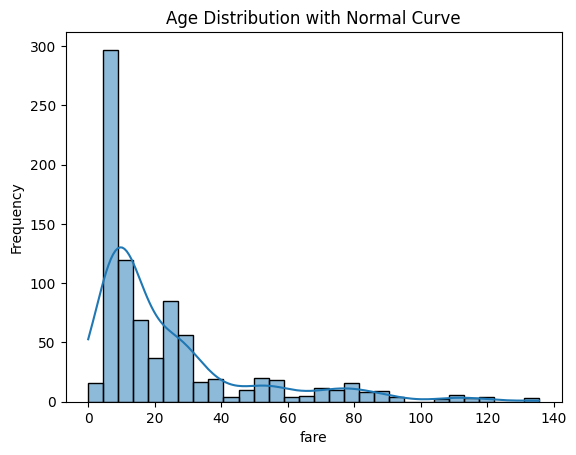

In [469]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'age' is the column of interest
sns.histplot(df['fare'], kde=True, bins=30)

# Adding labels and title
plt.xlabel('fare')
plt.ylabel('Frequency')
plt.title('Age Distribution with Normal Curve')

# Show the plot
plt.show()


In [473]:
df.drop('outliers',axis=1,inplace=True)

<ipython-input-473-4fcb046dd791>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('outliers',axis=1,inplace=True)


In [474]:
df.duplicated().sum()

0

In [475]:
df.drop_duplicates(inplace=True)

<ipython-input-475-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  735 non-null    int64  
 1   pclass    735 non-null    int64  
 2   sex       735 non-null    int64  
 3   age       735 non-null    int64  
 4   sibsp     735 non-null    int64  
 5   parch     735 non-null    int64  
 6   fare      735 non-null    float64
 7   embarked  735 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 51.7 KB
